# BW \#66 Pittsburgh
As you might know, 911 is the emergency phone number in the United States -- but for non-emergency issues, many cities have set up a similar service, at the phone number 311. The operators direct your call to the appropriate department, or pass your message along to it. We'll look at a data set of calls to Pittsburgh's 311 line through the year 2022

## Data and six questions
This week's questions are based on the 311 data. The home page for this data set is at

https://data.wprdc.org/dataset/311-data

This page includes links to the data and a data dictionary. It also says that the feed for this data was last working in December of 2022, and that they're working to restore it. So our data will only exist through 2022.

You can download the data from here:

https://tools.wprdc.org/downstream/76fda9d0-69be-4dd5-8108-0de7907fc5a4

## Challenges
The learning goals include working with time data, grouping (including the Grouper object), and plotting. 
- Read the 311 data into a data frame. Ensure that the "CREATED_ON" column is a datetime value.
- Create a stacked bar plot in which each bar represents the number of 311 requests in a given year. Each bar should show, via colorized sub-parts, the number of calls from each "REQUEST_ORIGIN". How do people submit most requests? Does this seems to be changing over time?

In [1]:
import pandas as pd

In [3]:
filename = "C:\\Users\\npigeon\\Git\\BW #66 Pittsburgh\\76fda9d0-69be-4dd5-8108-0de7907fc5a4.csv"

In [13]:
%%timeit
df = (
    pd.read_csv(filename)
    .assign(CREATED_ON = lambda df_:pd.to_datetime(df_['CREATED_ON']))
)

1.78 s ± 89 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


One solution is to pass the “parse_dates” keyword argument to “read_csv”, telling it which column(s) to treat as datetime values:

In [11]:
%%timeit
df = pd.read_csv(filename, 
                 parse_dates=['CREATED_ON']
)

1.68 s ± 53.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


A second option is to use the PyArrow engine for reading CSV files. PyArrow is a new, cross-platform, cross-language data structure that will eventually replace NumPy as the back-end storage for Pandas. We can use its CSV-parsing mechanism, though, even if we still store the data in NumPy, by setting the “engine” keyword argument:

In [9]:
!pip install pyarrow

   ---------------------------------------- 0.0/25.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.1 MB 660.6 kB/s eta 0:00:38
   ---------------------------------------- 0.0/25.1 MB 393.8 kB/s eta 0:01:04
   - -------------------------------------- 0.6/25.1 MB 4.5 MB/s eta 0:00:06
   ------- -------------------------------- 4.6/25.1 MB 24.5 MB/s eta 0:00:01
   ------------- -------------------------- 8.7/25.1 MB 37.2 MB/s eta 0:00:01
   ---------------------- ----------------- 13.8/25.1 MB 93.9 MB/s eta 0:00:01
   ------------------------------ --------- 19.0/25.1 MB 108.8 MB/s eta 0:00:01
   -------------------------------------- - 24.2/25.1 MB 131.2 MB/s eta 0:00:01
   ---------------------------------------  25.1/25.1 MB 108.8 MB/s eta 0:00:01
   ---------------------------------------- 25.1/25.1 MB 59.4 MB/s eta 0:00:00


In [6]:
%%timeit
df = pd.read_csv(filename, 
                 engine='pyarrow')

315 ms ± 9.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
df = pd.read_csv(filename, 
                 engine='pyarrow')
df

,_id,REQUEST_ID,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,X,Y,GEO_ACCURACY
0,1,203364.0,2017-12-15 14:53:00,Street Obstruction/Closure,Call Center,1,DOMI - Permits,Central Northside,1.0,22.0,4.200322e+10,1.0,22.0,1.0,1-7,-80.016716,40.454144,EXACT
1,2,200800.0,2017-11-29 09:54:00,Graffiti,Control Panel,1,Police - Zones 1-6,South Side Flats,3.0,16.0,4.200316e+10,3.0,16.0,3.0,4-24,-79.969952,40.429243,APPROXIMATE
2,3,201310.0,2017-12-01 13:23:00,Litter,Call Center,1,DPW - Street Maintenance,Troy Hill,1.0,24.0,4.200324e+10,1.0,24.0,1.0,1-2,-79.985859,40.459716,EXACT
3,4,200171.0,2017-11-22 14:54:00,Water Main Break,Call Center,1,Pittsburgh Water and Sewer Authority,Banksville,2.0,20.0,4.200320e+10,5.0,20.0,6.0,4-9,-80.034210,40.406969,EXACT
4,5,193043.0,2017-10-12 12:46:00,Guide Rail,Call Center,1,DPW - Construction Division,East Hills,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-19,-79.876582,40.451226,EXACT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680096,827877,700801.0,2022-12-21 17:47:00,Police - Submit a Tip,Website,0,Police - Zones 1-6,Garfield,9.0,10.0,4.200310e+10,2.0,10.0,5.0,3-4,-79.938182,40.466230,APPROXIMATE
680097,827878,700802.0,2022-12-21 17:50:00,Patrol,Call Center,0,Police - Zones 1-6,Morningside,7.0,10.0,4.200310e+10,2.0,10.0,5.0,3-7,-79.923957,40.486786,APPROXIMATE
680098,827879,700803.0,2022-12-21 17:51:00,"ADA Ramp, Installation",Website,0,DOMI - Streets,Shadyside,8.0,7.0,4.200307e+10,2.0,7.0,4.0,3-11,-79.929323,40.457669,APPROXIMATE
680099,827880,700804.0,2022-12-21 17:53:00,Bike Lane Bollard,Call Center,0,DPW - Construction Division,Shadyside,8.0,7.0,4.200307e+10,2.0,7.0,4.0,3-11,-79.925178,40.457374,EXACT


#### Create a stacked bar plot in which each bar represents the number of 311 requests in a given year. Each bar should show, via colorized sub-parts, the number of calls from each "REQUEST_ORIGIN". How do people submit most requests? Does this seems to be changing over time?

<Axes: xlabel='CREATED_ON'>

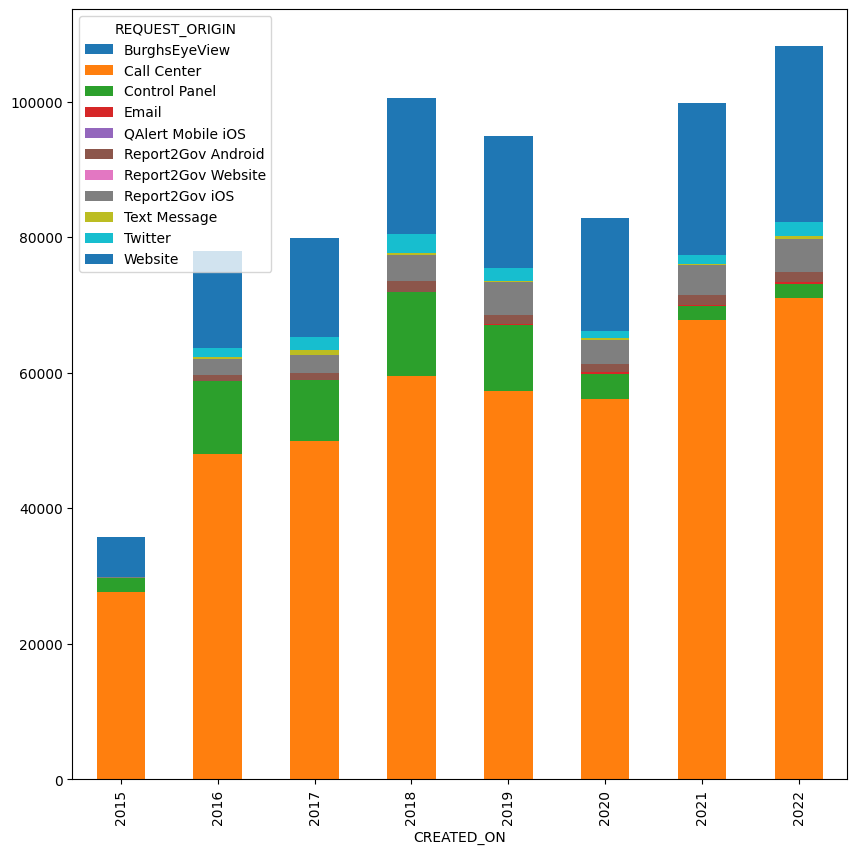

In [17]:
(
    df
    .pivot_table(index=df['CREATED_ON'].dt.year,
                 columns='REQUEST_ORIGIN',
                 aggfunc='count',
                values='REQUEST_ID')
).plot.bar(stacked=True,figsize=(10,10))

The chart shows that for all of the cynicism (including mine!) about how much people are using their phones to make actual calls, we can see here that the overwhelming majority of people contacting 311 are indeed calling that number